## ベースラインの作成

Kaggleの Home Credit Default Risk コンペティションを題材に、機械学習の実践的な流れを学びます。特に適切な 検証 を行い、高い 汎化性能 のあるモデルを完成させることを目指します。


[Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
train = pd.read_csv(
    "../diveintocode-ml/home-credit-default-risk/application_train.csv")
test = pd.read_csv(
    "../diveintocode-ml/home-credit-default-risk/application_test.csv")

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


前回のベースラインモデルでは文字列を含む特徴量を含めないで行ってきたが、今回は全特徴量を対象にして、ベースラインモデル作成を行う。それに伴い、対象の特徴量に対象にエンコーディング作業を行う。

- 特徴量内のクラスが2つ以下のものはlabel encordingを行う。
- 特徴量内のクラスが2つよりも多いものはone-hot encordingを行う。

In [5]:
# 特徴量のデータ型を確認

train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
# object型の中身を確認

train_object = train.select_dtypes('object').columns.tolist()
print('objectの数：', len(train_object))
train_object

objectの数： 16


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [7]:
# object型のクラス名とクラス数を取得

object_name = train.select_dtypes('object').apply(pd.Series.unique, axis=0)
print(object_name)
for i in object_name:
    print(len(i))

NAME_CONTRACT_TYPE                                [Cash loans, Revolving loans]
CODE_GENDER                                                         [M, F, XNA]
FLAG_OWN_CAR                                                             [N, Y]
FLAG_OWN_REALTY                                                          [Y, N]
NAME_TYPE_SUITE               [Unaccompanied, Family, Spouse, partner, Child...
NAME_INCOME_TYPE              [Working, State servant, Commercial associate,...
NAME_EDUCATION_TYPE           [Secondary / secondary special, Higher educati...
NAME_FAMILY_STATUS            [Single / not married, Married, Civil marriage...
NAME_HOUSING_TYPE             [House / apartment, Rented apartment, With par...
OCCUPATION_TYPE               [Laborers, Core staff, Accountants, Managers, ...
WEEKDAY_APPR_PROCESS_START    [WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY...
ORGANIZATION_TYPE             [Business Entity Type 3, School, Government, R...
FONDKAPREMONT_MODE            [reg oper 

In [8]:
#目的変数(TARGET)と正の相関性の高いものを、相関性が高い方から順に10個表示

train_corr = train.corr()
train_corr_plus = train_corr['TARGET'].sort_values(ascending=False)# ascending=Trueで負の相関性になる
print('Most Positive Correlations:\n', train_corr_plus[1:].head(10))

Most Positive Correlations:
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


In [9]:
#目的変数(TARGET)と正の相関性の高いものを、相関性が高い方から順に10個表示

train_corr_minus = train_corr['TARGET'].sort_values(ascending=True)
print('Most Negative Correlations:\n', train_corr_minus.head(10))

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [10]:
#訓練データセットの作成

x1 = pd.DataFrame(train, columns = ['DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE'])
x1_after = x1 / -365# 異常値の処理
x2 = pd.DataFrame(train, columns = ['REGION_RATING_CLIENT_W_CITY', 
                                'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 
                                'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 
                                'NAME_EDUCATION_TYPE', 'CODE_GENDER'])

X = pd.concat([x1_after, x2], axis=1)
y = pd.DataFrame(train, columns=["TARGET"])
print(X.head())
print(y.head())

   DAYS_BIRTH  DAYS_LAST_PHONE_CHANGE  REGION_RATING_CLIENT_W_CITY  \
0   25.920548                3.106849                            2   
1   45.931507                2.268493                            1   
2   52.180822                2.232877                            2   
3   52.068493                1.690411                            2   
4   54.608219                3.030137                            2   

   REGION_RATING_CLIENT NAME_INCOME_TYPE NAME_CONTRACT_TYPE  EXT_SOURCE_3  \
0                     2          Working         Cash loans      0.139376   
1                     1    State servant         Cash loans           NaN   
2                     2          Working    Revolving loans      0.729567   
3                     2          Working         Cash loans           NaN   
4                     2          Working         Cash loans           NaN   

   EXT_SOURCE_2  EXT_SOURCE_1            NAME_EDUCATION_TYPE CODE_GENDER  
0      0.262949      0.083037  Secondary 

In [11]:
#検証データセットの作成

x3 = pd.DataFrame(test, columns = ['DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE'])
x3_after = x3 / -365# 異常値の処理
x4 = pd.DataFrame(train, columns = ['REGION_RATING_CLIENT_W_CITY', 
                                'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 
                                'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 
                                'NAME_EDUCATION_TYPE', 'CODE_GENDER'])
x = pd.concat([x3_after, x4], axis=1)
print(x.head())

   DAYS_BIRTH  DAYS_LAST_PHONE_CHANGE  REGION_RATING_CLIENT_W_CITY  \
0   52.715068                4.767123                            2   
1   49.490411               -0.000000                            1   
2   54.898630                2.345205                            2   
3   38.290411                4.945205                            2   
4   35.726027                2.249315                            2   

   REGION_RATING_CLIENT NAME_INCOME_TYPE NAME_CONTRACT_TYPE  EXT_SOURCE_3  \
0                     2          Working         Cash loans      0.139376   
1                     1    State servant         Cash loans           NaN   
2                     2          Working    Revolving loans      0.729567   
3                     2          Working         Cash loans           NaN   
4                     2          Working         Cash loans           NaN   

   EXT_SOURCE_2  EXT_SOURCE_1            NAME_EDUCATION_TYPE CODE_GENDER  
0      0.262949      0.083037  Secondary 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# 特徴量内のクラスが2つ以下のものはlabel encording

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X:
    if X[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X[col].unique())) <= 2:
            # Train on the training data
            le.fit(X[col])
            # Transform both training and testing data
            X[col] = le.transform(X[col])
            x[col] = le.transform(x[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [14]:
# 特徴量内のクラスが2つよりも多いものはone-hot encordingを行う。

X = pd.get_dummies(X)
x = pd.get_dummies(x)

In [15]:
# 欠損値を確認

pd.set_option('display.max_rows', None)
print(sum(X.isnull().sum()))
print(sum(x.isnull().sum()))
print(sum(y.isnull().sum()))
print(sum(test.isnull().sum()))

235004
752537
0
1404419


In [16]:
#欠損値を0で埋める
X.fillna(0, inplace=True)
x.fillna(0, inplace=True)
test.fillna(0, inplace=True)
#欠損値が消えたか再確認
print(sum(X.isnull().sum()))
print(sum(x.isnull().sum()))
print(sum(test.isnull().sum()))

0
0
0


In [17]:
# 試しに訓練データの中身を確認

X.head()

,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,...,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,25.920548,3.106849,2,2,0,0.139376,0.262949,0.083037,0,0,...,0,1,0,0,0,0,1,0,1,0
1,45.931507,2.268493,1,1,0,0.000000,0.622246,0.311267,0,0,...,0,0,0,1,0,0,0,1,0,0
2,52.180822,2.232877,2,2,1,0.729567,0.555912,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0
3,52.068493,1.690411,2,2,0,0.000000,0.650442,0.000000,0,0,...,0,1,0,0,0,0,1,1,0,0
4,54.608219,3.030137,2,2,0,0.000000,0.322738,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0


In [18]:
x.head()

,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,...,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,52.715068,4.767123,2,2,0,0.139376,0.262949,0.083037,0,0,...,0,1,0,0,0,0,1,0,1,0
1,49.490411,-0.000000,1,1,0,0.000000,0.622246,0.311267,0,0,...,0,0,0,1,0,0,0,1,0,0
2,54.898630,2.345205,2,2,1,0.729567,0.555912,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0
3,38.290411,4.945205,2,2,0,0.000000,0.650442,0.000000,0,0,...,0,1,0,0,0,0,1,1,0,0
4,35.726027,2.249315,2,2,0,0.000000,0.322738,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0


In [19]:
print(X.shape)
print(x.shape)

(307511, 24)
(307511, 24)


In [20]:
# ndarrayに変換

X = X.values
y = y.values

In [21]:
#データを分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)

X_train: (230633, 24)
y_train: (230633, 1)
X_val: (76878, 24)
y_val: (76878, 1)


In [22]:
# sklearnから標準化をするモデルをインポートする
from sklearn.preprocessing import StandardScaler
# モデルをインスタンス化して、モデルの中にあるメソッドを使える状態にする。
scaler = StandardScaler()

# 標準化をする（訓練用データで.fitを行う）
scaler.fit(X_train)

# 標準化をする（訓練用、検証用双方で.transformを行う）
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

print('X_train_mean:', X_train_std.mean(axis=0))
print('X_train_std:', X_train_std.std(axis=0))
print('X_val_mean:', X_val_std.mean(axis=0))
print('X_val_std:', X_val_std.std(axis=0))

X_train_mean: [-1.43493184e-14 -1.17940998e-13  1.23366321e-15  3.32880938e-15
  6.08224376e-15 -5.87985808e-14  2.40663356e-15 -1.08529270e-14
  7.21983166e-16  3.15925899e-15 -2.55618289e-15 -1.78223883e-15
  6.07582118e-15  4.97964783e-15  1.59583783e-15  1.88717552e-15
 -6.48723309e-15 -9.85824593e-16 -4.12002579e-15 -3.19662738e-16
  1.01339905e-15 -2.77657520e-15 -1.65844164e-15 -2.11175837e-15]
X_train_std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_val_mean: [-6.80215883e-03  1.45845418e-03  3.88827555e-03  3.09021477e-03
  3.08935098e-03 -1.15886752e-03  6.45977007e-04  1.92430145e-03
 -4.16465171e-03 -1.61251620e-03  3.60660817e-03 -4.62444857e-03
  3.74607456e-03  9.21878102e-03  1.04113584e-03  2.89336373e-03
 -4.40134479e-03  1.82669977e-03  2.58483086e-03  1.19045419e-02
 -5.39088780e-03  1.38345332e-03 -1.38346585e-03 -1.56379366e-08]
X_val_std: [0.99738035 1.00162567 0.99883237 0.99827955 1.00425373 1.00151887
 1.00141636 0.99911649 0.57

In [23]:
#ランダムフォレストで学習、推定
from sklearn.ensemble import RandomForestClassifier# 2値分類問題なのでClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
y_pred_rf_base = rf.predict_proba(X_val_std)# probaで各確率を返す
y_pred_rf_base# ［0である確率, 1である確率］

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([[0.77, 0.23],
       [0.99, 0.01],
       [0.89, 0.11],
       ...,
       [1.  , 0.  ],
       [0.71, 0.29],
       [0.89, 0.11]])

AUC 0.694826627730048


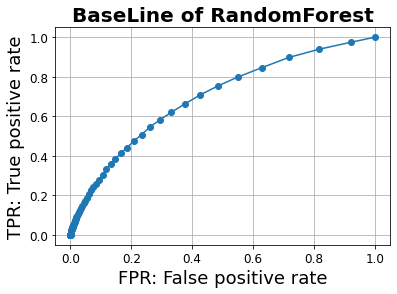

In [24]:
# 評価（ROC曲線とAUC）
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 3つの要素は順番にfpr, tpr, thresholdsで、それぞれFPR（偽陽性率）、TPR（真陽性率）、閾値
fpr, tpr, threshold = roc_curve(y_val, y_pred_rf_base[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('BaseLine of RandomForest', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()
print('AUC', roc_auc_score(y_val, y_pred_rf_base[:, 1]))

In [25]:
df_pred = pd.DataFrame({'BASELINE':roc_auc_score(y_val, y_pred_rf_base[:, 1])}, 
                      index = ['AUC'])
df_pred

,BASELINE
AUC,0.694827


**ベースラインモデル作成終了**

## 【問題1】クロスバリデーション

事前学習期間では検証データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。


事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。

クロスバリデーションには４つの方法がある。

- ホールドアウト法
- Repeated K-Fold cross validator
- Stratified K-Folds cross-validator
- Repeated Stratified K-Fold cross validator

## 【問題2】グリッドサーチ

これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。


scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

In [26]:
# パラメーターを探す

rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
from sklearn.model_selection import KFold

kf_5 = KFold(n_splits=5)
kf_5.get_n_splits(X)

print(kf_5)

for train_index, test_index in kf_5.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 61503  61504  61505 ... 307508 307509 307510] TEST: [    0     1     2 ... 61500 61501 61502]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61503  61504  61505 ... 123002 123003 123004]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [123005 123006 123007 ... 184504 184505 184506]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [184507 184508 184509 ... 246006 246007 246008]
TRAIN: [     0      1      2 ... 246006 246007 246008] TEST: [246009 246010 246011 ... 307508 307509 307510]


In [28]:
# グリッドサーチ

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators": [120, 300], "max_features": ['log2', 'sqrt'], 
               "max_depth":[5, 8],  "min_samples_split": [2, 5], 
                "min_samples_leaf":[2, 5]}
                                                                       
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())

print("一番正答率の良いパラメーターは{}で、正答率は{}です。".format(clf.best_params_, clf.best_score_))

clf_result = pd.DataFrame(clf.cv_results_)
display(clf_result.sort_values('rank_test_score'))

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


一番正答率の良いパラメーターは{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}で、正答率は0.7289041474739606です。


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,118.417089,0.246292,2.342749,0.108464,8,log2,2,5,300,"{'max_depth': 8, 'max_features': 'log2', 'min_...",0.732070,0.728505,0.730407,0.719403,0.734136,0.728904,0.005101,1
30,48.012609,2.545602,1.048898,0.014894,8,sqrt,5,5,120,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.731442,0.728733,0.730122,0.719178,0.734692,0.728833,0.005216,2
21,121.152378,0.566620,2.360567,0.308839,8,log2,5,2,300,"{'max_depth': 8, 'max_features': 'log2', 'min_...",0.731998,0.728879,0.729901,0.719311,0.733863,0.728790,0.005042,3
27,82.974131,0.391964,1.704623,0.035529,8,sqrt,2,5,300,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.731739,0.728740,0.730100,0.719106,0.734210,0.728779,0.005169,4
17,109.150383,2.230135,2.435243,0.046797,8,log2,2,2,300,"{'max_depth': 8, 'max_features': 'log2', 'min_...",0.731113,0.728829,0.730084,0.720201,0.733609,0.728767,0.004562,5
29,111.112413,5.523308,2.407559,0.266783,8,sqrt,5,2,300,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.730946,0.728662,0.730229,0.720028,0.733965,0.728766,0.004697,6
23,92.465511,6.588349,1.682025,0.021075,8,log2,5,5,300,"{'max_depth': 8, 'max_features': 'log2', 'min_...",0.731235,0.728515,0.730125,0.719913,0.733843,0.728726,0.004736,7
31,83.695350,10.208032,1.391952,0.184237,8,sqrt,5,5,300,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.730984,0.729208,0.729607,0.719002,0.734594,0.728679,0.005198,8
25,80.997177,0.424976,1.674195,0.035457,8,sqrt,2,2,300,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.730675,0.727986,0.730603,0.719740,0.733729,0.728546,0.004764,9
28,33.612799,0.474595,0.717092,0.011710,8,sqrt,5,2,120,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.731094,0.728103,0.730423,0.719895,0.732969,0.728497,0.004574,10


In [29]:
#グリットサーチで選出されたハイパーパラメーターで学習、推定

a
rf = RandomForestClassifier(max_depth=8, max_features='log2', 
                            min_samples_leaf=2, min_samples_split=5, n_estimators=300)
rf.fit(X_train, y_train)
y_pred_kfold = rf.predict_proba(X_val)# probaで各確率を返す
y_pred_kfold# ［0である確率, 1である確率］

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([[0.84950712, 0.15049288],
       [0.97618914, 0.02381086],
       [0.90750292, 0.09249708],
       ...,
       [0.96705442, 0.03294558],
       [0.81536593, 0.18463407],
       [0.93768871, 0.06231129]])

AUC: 0.7443779550165525


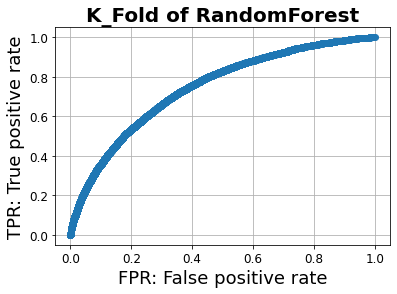

In [30]:
# 評価

fpr, tpr, threshold = roc_curve(y_val, y_pred_kfold[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('K_Fold of RandomForest', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()
print('AUC:', roc_auc_score(y_val,y_pred_kfold[:, 1]))

In [31]:
#AUCを表に追加

df_pred = df_pred.assign(K_Fold = [roc_auc_score(y_val, y_pred_kfold[:, 1])])
df_pred

,BASELINE,K_Fold
AUC,0.694827,0.744378


**グリットサーチをする前のAUCが0.694827で、後が0.744378なので、グリットサーチの結果に従ってパラメーターを調整してみると、モデルの改善が見られた。また、クロスバリデーションも分割する度にAUCが上がっていっているようなので、過学習はしてなさそうである。**

## 【問題3】Kaggle Notebooksからの調査

KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

1. クロスバリデーションをホールドアウト法以外でで行っている人がいたので、4種類のクロスバリデーションの中から、問４、５で使用するクロスバリデーションを決める。
2. LightGBMを使用している人が多い。
3. 過学習防止の為にEarly Stoppingを使用する。
4. ランダムフォレストのパラメーターを更に調整する

## 【問題4】高い汎化性能のモデル作成

問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。

その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

### ホールドアウト法以外クロスバリデーションを用いる
4種類のクロスバリデーションの中から、この後使用するバリデーション方法を決める。

- ホールドアウト法（問３にて実施）
- Repeated K-Fold cross validator
- Stratified K-Folds cross-validator
- Repeated Stratified K-Fold cross validator

#### Repeated K-Fold cross validator

In [32]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [    14     24     28 ... 307497 307498 307499]
TRAIN: [     1      3      4 ... 307508 307509 307510] TEST: [     0      2      5 ... 307482 307483 307496]
TRAIN: [     0      1      2 ... 307503 307504 307509] TEST: [     6      8     16 ... 307507 307508 307510]
TRAIN: [     0      1      2 ... 307507 307508 307510] TEST: [     3      7      9 ... 307494 307504 307509]
TRAIN: [     0      2      3 ... 307508 307509 307510] TEST: [     1      4     21 ... 307501 307502 307503]
TRAIN: [     2      6      7 ... 307506 307507 307508] TEST: [     0      1      3 ... 307485 307509 307510]
TRAIN: [     0      1      2 ... 307506 307509 307510] TEST: [     7     17     18 ... 307500 307507 307508]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [     6      9     11 ... 307499 307505 307506]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [    15     16     20 ... 307501 307502 307504]
TRAIN: [     0     

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


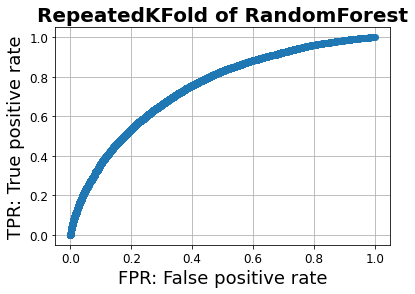

In [33]:
#グリットサーチで選出されたハイパーパラメーターで学習、推定
rf.fit(X_train, y_train)
y_pred_rf_RepeatedKFold = rf.predict_proba(X_val)# probaで各確率を返す
y_pred_rf_RepeatedKFold# ［0である確率, 1である確率］

# 評価
fpr, tpr, threshold = roc_curve(y_val, y_pred_rf_RepeatedKFold[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('RepeatedKFold of RandomForest', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()

#AUCを表に追加
df_pred = df_pred.assign(RepeatedKFold = [roc_auc_score(y_val, y_pred_rf_RepeatedKFold[:, 1])])

#### Stratified K-Folds cross-validator

In [34]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

#print(skf)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 61465  61466  61467 ... 307508 307509 307510] TEST: [    0     1     2 ... 61814 61816 61828]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61465  61466  61467 ... 123093 123094 123095]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [121993 122029 122030 ... 184624 184625 184626]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [183271 183273 183278 ... 246095 246097 246099]
TRAIN: [     0      1      2 ... 246095 246097 246099] TEST: [244997 245014 245015 ... 307508 307509 307510]


/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


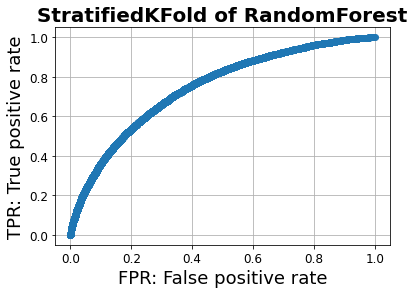

In [35]:
#グリットサーチで選出されたハイパーパラメーターで学習、推定
rf.fit(X_train, y_train)
y_pred_rf_StratifiedKFold = rf.predict_proba(X_val)# probaで各確率を返す
y_pred_rf_StratifiedKFold# ［0である確率, 1である確率］

# 評価（ROC曲線とAUC）
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 3つの要素は順番にfpr, tpr, thresholdsで、それぞれFPR（偽陽性率）、TPR（真陽性率）、閾値
fpr, tpr, threshold = roc_curve(y_val, y_pred_rf_StratifiedKFold[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('StratifiedKFold of RandomForest', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()

#AUCを表に追加
df_pred = df_pred.assign(StratifiedKFold = [roc_auc_score(y_val, y_pred_rf_StratifiedKFold[:, 1])])

#### Repeated Stratified K-Fold cross validator

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

for train_index, test_index in rskf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [     0      1      2 ... 307506 307507 307508] TEST: [    12     13     16 ... 307486 307509 307510]
TRAIN: [     0      1      3 ... 307508 307509 307510] TEST: [     2      5      8 ... 307481 307498 307503]
TRAIN: [     2      3      4 ... 307507 307509 307510] TEST: [     0      1      7 ... 307489 307501 307508]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [     9     18     19 ... 307505 307506 307507]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [     3      4      6 ... 307494 307497 307500]
TRAIN: [     0      1      2 ... 307506 307509 307510] TEST: [     5      7      9 ... 307505 307507 307508]
TRAIN: [     0      1      2 ... 307506 307507 307508] TEST: [     8     26     29 ... 307504 307509 307510]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [     6     12     13 ... 307491 307493 307506]
TRAIN: [     0      1      5 ... 307508 307509 307510] TEST: [     2      3      4 ... 307495 307499 307503]
TRAIN: [     2     

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,BASELINE,K_Fold,RepeatedKFold,StratifiedKFold,RepeatedStratifiedKFold
AUC,0.694827,0.744378,0.744284,0.74477,0.74458


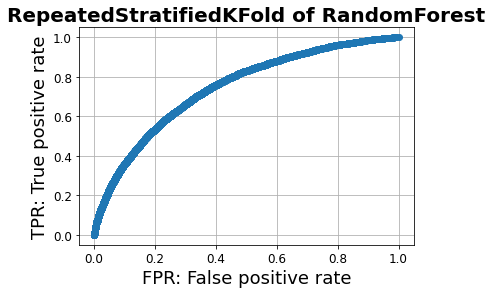

In [37]:
#グリットサーチで選出されたハイパーパラメーターで学習、推定
rf.fit(X_train, y_train)
y_pred_rf_RepeatedStratifiedKFold = rf.predict_proba(X_val)# probaで各確率を返す
y_pred_rf_RepeatedStratifiedKFold# ［0である確率, 1である確率］

# 評価
fpr, tpr, threshold = roc_curve(y_val, y_pred_rf_RepeatedStratifiedKFold[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('RepeatedStratifiedKFold of RandomForest', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()

#AUCを表に追加、描写
df_pred = df_pred.assign(RepeatedStratifiedKFold = [roc_auc_score(y_val, y_pred_rf_RepeatedStratifiedKFold[:, 1])])
df_pred

**パラメーターの条件を同じにして分け方を変えてみたところ、StratifiedKFoldが最も良いAUCを出した。今後はStratifiedKFoldを用いてクロスバリデーションを行っていく。**

### LightGBMを使用する

[lightgbm.LGBMClassifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier)

[LGBM](https://lightgbm.readthedocs.io/en/latest/Python-API.html)

In [38]:
import lightgbm as lgb

In [39]:
#グリットサーチ

model = lgb.LGBMClassifier()

parameters = {'num_leaves':[7, 31], 'max_depth':[10, 50], 
              'min_child_weight':[5, 15], 'learning_rate':[0.1, 0.01], 
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='roc_auc')
clf.fit(X, y)

sorted(clf.cv_results_.keys())

print("一番正答率の良いパラメーターは{}で、正答率は{}です。".format(clf.best_params_, clf.best_score_))

clf_result = pd.DataFrame(clf.cv_results_)
display(clf_result.sort_values('rank_test_score'))

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
一番正答率の良いパラメーターは{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'num_leaves': 31, 'random_state': 0}で、正答率は0.7407062256911737です。


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_num_leaves,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,3.158268,0.024035,0.611459,0.019922,0.1,10,5,31,0,"{'learning_rate': 0.1, 'max_depth': 10, 'min_c...",0.740852,0.741099,0.734744,0.742306,0.744529,0.740706,0.003252,1
7,3.549969,0.015241,0.697356,0.011124,0.1,50,15,31,0,"{'learning_rate': 0.1, 'max_depth': 50, 'min_c...",0.741231,0.740801,0.734943,0.742103,0.743927,0.740601,0.003026,2
5,3.468951,0.059504,0.643782,0.028915,0.1,50,5,31,0,"{'learning_rate': 0.1, 'max_depth': 50, 'min_c...",0.740941,0.740392,0.734918,0.742087,0.743708,0.740409,0.002971,3
3,3.601004,0.089766,0.717322,0.023521,0.1,10,15,31,0,"{'learning_rate': 0.1, 'max_depth': 10, 'min_c...",0.741214,0.740403,0.734499,0.742131,0.743688,0.740387,0.003140,4
2,2.667885,0.029642,0.406489,0.008742,0.1,10,15,7,0,"{'learning_rate': 0.1, 'max_depth': 10, 'min_c...",0.740633,0.738885,0.733402,0.741638,0.743412,0.739594,0.003426,5
6,2.853264,0.023058,0.417356,0.011264,0.1,50,15,7,0,"{'learning_rate': 0.1, 'max_depth': 50, 'min_c...",0.740633,0.738885,0.733402,0.741638,0.743412,0.739594,0.003426,5
0,2.606104,0.012769,0.374120,0.005948,0.1,10,5,7,0,"{'learning_rate': 0.1, 'max_depth': 10, 'min_c...",0.740674,0.738841,0.733353,0.741628,0.743054,0.739510,0.003369,7
4,3.038447,0.129541,0.424024,0.018775,0.1,50,5,7,0,"{'learning_rate': 0.1, 'max_depth': 50, 'min_c...",0.740674,0.738841,0.733353,0.741628,0.743054,0.739510,0.003369,7
9,4.283944,0.013546,0.646991,0.009196,0.01,10,5,31,0,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.728687,0.727868,0.722526,0.729878,0.731646,0.728121,0.003073,9
15,3.737590,0.128360,0.455786,0.042702,0.01,50,15,31,0,"{'learning_rate': 0.01, 'max_depth': 50, 'min_...",0.728602,0.727859,0.722603,0.730038,0.731484,0.728117,0.003024,10


In [40]:
#StratifiedKFoldでクロスバリデーション

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 61465  61466  61467 ... 307508 307509 307510] TEST: [    0     1     2 ... 61814 61816 61828]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61465  61466  61467 ... 123093 123094 123095]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [121993 122029 122030 ... 184624 184625 184626]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [183271 183273 183278 ... 246095 246097 246099]
TRAIN: [     0      1      2 ... 246095 246097 246099] TEST: [244997 245014 245015 ... 307508 307509 307510]


/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,BASELINE,K_Fold,RepeatedKFold,StratifiedKFold,RepeatedStratifiedKFold,LGBMClassifier
AUC,0.694827,0.744378,0.744284,0.74477,0.74458,0.760065


/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


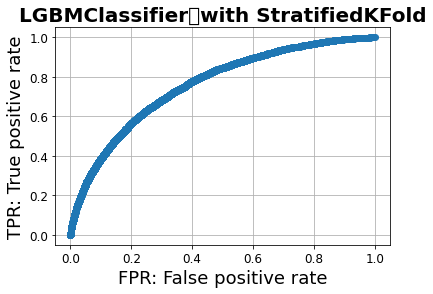

In [41]:
#グリットサーチで選出されたハイパーパラメーターで学習、推定
#上記の警告文でmax_depth> num_leavesでないと精度が悪くなるとのことなので、
#条件に合う2番目にAUCが良いモデルを選定

lgbm = lgb.LGBMClassifier(learning_rate=0.1, max_depth=50, min_child_weight=5, 
                      num_leaves=31, random_state=0)

lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict_proba(X_val)# probaで各確率を返す
y_pred_lgb# ［0である確率, 1である確率］

# 評価
fpr, tpr, threshold = roc_curve(y_val, y_pred_lgb[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('LGBMClassifier　with StratifiedKFold', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()

#AUCを表に追加、描写
df_pred = df_pred.assign(LGBMClassifier = [roc_auc_score(y_val, y_pred_lgb[:, 1])])
df_pred

**LightGBMを使用したことにより更にAUCが0.74477→0.760065に上がった。**

### 過学習防止の為にEarly Stoppingを使用する
前回のクロスバリデーションでは分裂する事にAUCが上下していたことからも過学習していたことが示唆される。このことからEarly Stoppingを使用してみる。

In [42]:
#StratifiedKFoldでクロスバリデーション

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 61465  61466  61467 ... 307508 307509 307510] TEST: [    0     1     2 ... 61814 61816 61828]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61465  61466  61467 ... 123093 123094 123095]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [121993 122029 122030 ... 184624 184625 184626]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [183271 183273 183278 ... 246095 246097 246099]
TRAIN: [     0      1      2 ... 246095 246097 246099] TEST: [244997 245014 245015 ... 307508 307509 307510]


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	valid_0's auc: 0.706295	valid_0's l2: 0.0734708
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.712724	valid_0's l2: 0.0728529
[3]	valid_0's auc: 0.717496	valid_0's l2: 0.0723578
[4]	valid_0's auc: 0.721208	valid_0's l2: 0.0719029
[5]	valid_0's auc: 0.723191	valid_0's l2: 0.0715269
[6]	valid_0's auc: 0.725417	valid_0's l2: 0.071223
[7]	valid_0's auc: 0.725979	valid_0's l2: 0.0709444
[8]	valid_0's auc: 0.726931	valid_0's l2: 0.0707117
[9]	valid_0's auc: 0.727973	valid_0's l2: 0.0705068
[10]	valid_0's auc: 0.729625	valid_0's l2: 0.0703266
[11]	valid_0's auc: 0.730317	valid_0's l2: 0.0701894
[12]	valid_0's auc: 0.730959	valid_0's l2: 0.0700706
[13]	valid_0's auc: 0.731515	valid_0's l2: 0.0699641
[14]	valid_0's auc: 0.731829	valid_0's l2: 0.0698713
[15]	valid_0's auc: 0.732111	valid_0's l2: 0.0697941
[16]	valid_0's auc: 0.732766	valid_0's l2: 0.0697138
[17]	valid_0's auc: 0.733388	valid_0's l2: 0.069635
[18]	valid_0's auc: 0.733922	valid_0's l2: 0.069

,BASELINE,K_Fold,RepeatedKFold,StratifiedKFold,RepeatedStratifiedKFold,LGBMClassifier,LGBM_EarlyStopping
AUC,0.694827,0.744378,0.744284,0.74477,0.74458,0.760065,0.754232


/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


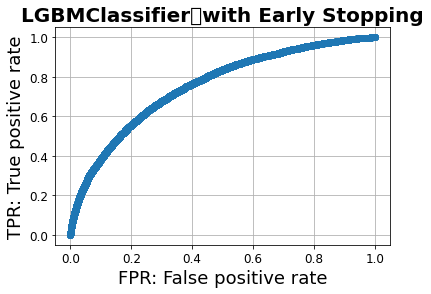

In [43]:
lgbmearly = lgb.LGBMClassifier(objective='regression',
                        num_leaves = 31,
                        learning_rate=0.1,
                        min_child_weight=15,
                        max_depth=50, 
                        random_state=0)

lgbmearly.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='auc',
        early_stopping_rounds=100)
y_pred_lgbm = lgbmearly.predict_proba(X_val)# probaで各確率を返す
y_pred_lgbm# ［0である確率, 1である確率］

# 評価
fpr, tpr, threshold = roc_curve(y_val, y_pred_lgbm[:, 1])# 1である確率なので、欲しいのは一列目
plt.plot(fpr, tpr, marker='o')
plt.tick_params(labelsize=12)
plt.title('LGBMClassifier　with Early Stopping', size=20, weight='heavy')
plt.xlabel('FPR: False positive rate', size=18)
plt.ylabel('TPR: True positive rate', size=18)
plt.grid()

#AUCを表に追加、描写
df_pred = df_pred.assign(LGBM_EarlyStopping = [roc_auc_score(y_val, y_pred_lgbm[:, 1])])
df_pred

**Early Stoppingをしたが、AUCが下がった。一番AUCの良いモデルは通常のLightGBMであったが、過学習していたのが気になる。その為、Early Stopping有りと無しのモデルをKaggleに提出用に作る。**

## 【問題5】最終的なモデルの選定

最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

**アイデア**
1. 前処理：TARGETに相関性の高い特徴量の選定、異常値の処理、欠損値を０に代替、ラベルエンコーディング、one-hotエンコーディング、標準化、クロスバリデーション、グリットサーチ

2. 学習：ランダムフォレスト、LightGBM、 Early Stopping

3. 評価；ROC, AUC

In [49]:
print(sum(x.isnull().sum()))
x.head()

0


,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,...,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,52.715068,4.767123,2,2,0,0.139376,0.262949,0.083037,0,0,...,0,1,0,0,0,0,1,0,1,0
1,49.490411,-0.000000,1,1,0,0.000000,0.622246,0.311267,0,0,...,0,0,0,1,0,0,0,1,0,0
2,54.898630,2.345205,2,2,1,0.729567,0.555912,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0
3,38.290411,4.945205,2,2,0,0.000000,0.650442,0.000000,0,0,...,0,1,0,0,0,0,1,1,0,0
4,35.726027,2.249315,2,2,0,0.000000,0.322738,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0


In [50]:
x5 = pd.DataFrame(test, columns = ['SK_ID_CURR'])
x = pd.concat([x, x5], axis=1)

x.head()

,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,...,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,SK_ID_CURR
0,52.715068,4.767123,2,2,0,0.139376,0.262949,0.083037,0,0,...,1,0,0,0,0,1,0,1,0,100001.0
1,49.490411,-0.000000,1,1,0,0.000000,0.622246,0.311267,0,0,...,0,0,1,0,0,0,1,0,0,100005.0
2,54.898630,2.345205,2,2,1,0.729567,0.555912,0.000000,0,0,...,1,0,0,0,0,1,0,1,0,100013.0
3,38.290411,4.945205,2,2,0,0.000000,0.650442,0.000000,0,0,...,1,0,0,0,0,1,1,0,0,100028.0
4,35.726027,2.249315,2,2,0,0.000000,0.322738,0.000000,0,0,...,1,0,0,0,0,1,0,1,0,100038.0


In [54]:
# 検証データで推定する時にSK_ID_CURRが邪魔になるので、切り落とす
x_non_ID = x.drop(columns='SK_ID_CURR')
x_non_ID.head()

,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,...,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,52.715068,4.767123,2,2,0,0.139376,0.262949,0.083037,0,0,...,0,1,0,0,0,0,1,0,1,0
1,49.490411,-0.000000,1,1,0,0.000000,0.622246,0.311267,0,0,...,0,0,0,1,0,0,0,1,0,0
2,54.898630,2.345205,2,2,1,0.729567,0.555912,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0
3,38.290411,4.945205,2,2,0,0.000000,0.650442,0.000000,0,0,...,0,1,0,0,0,0,1,1,0,0
4,35.726027,2.249315,2,2,0,0.000000,0.322738,0.000000,0,0,...,0,1,0,0,0,0,1,0,1,0


In [55]:
# Early Stopping無し

lgbm.fit(X_train, y_train)
y_pred_submit1 = lgbm.predict_proba(x_non_ID)# probaで各確率を返す
print(y_pred_submit1)# ［0である確率, 1である確率］

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[0.45608066 0.54391934]
 [0.94839246 0.05160754]
 [0.97308605 0.02691395]
 ...
 [0.95579742 0.04420258]
 [0.89925636 0.10074364]
 [0.95633277 0.04366723]]


In [56]:
# Early Stopping有り

lgbmearly.fit(X_train, y_train)
y_pred_submit2 = lgbmearly.predict_proba(x_non_ID)# probaで各確率を返す
print(y_pred_submit2)# ［0である確率, 1である確率］

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[[0.55935865 0.44064135]
 [0.95982254 0.04017746]
 [0.97618842 0.02381158]
 ...
 [0.9045108  0.0954892 ]
 [0.91430046 0.08569954]
 [0.91970159 0.08029841]]


In [58]:
# Submission dataframe1、Early Stopping無し

submit_lgb = pd.DataFrame(x['SK_ID_CURR'])

submit_lgb['TARGET'] = y_pred_submit1[:, 1]# TARGET1である確率

submit_lgb.head()

,SK_ID_CURR,TARGET
0,100001.0,0.543919
1,100005.0,0.051608
2,100013.0,0.026914
3,100028.0,0.048876
4,100038.0,0.208758


In [59]:
# Submission dataframe2、Early Stopping無し

submit_lgbm = pd.DataFrame(x['SK_ID_CURR'])

submit_lgbm['TARGET'] = y_pred_submit2[:, 1]# TARGET1である確率

submit_lgbm.head()

,SK_ID_CURR,TARGET
0,100001.0,0.440641
1,100005.0,0.040177
2,100013.0,0.023812
3,100028.0,0.055861
4,100038.0,0.206670


In [60]:
# Save the submission dataframe
submit_lgb.to_csv('submission-house-lgb.csv', index = False)

In [61]:
# Save the submission dataframe
submit_lgbm.to_csv('submission-house-lgbearly.csv', index = False)